# Clustering GPA and IQ: Academic and Cognitive Insights

**Author:** SALMAN FAISHAL

## Overview

Ini adalah notebook untuk melakukan analisis clustering pada dataset GPA dan IQ untuk mendapatkan wawasan akademik dan kognitif. Dalam notebook ini, saya akan melakukan beberapa langkah analisis, termasuk eksplorasi data, preprocessing, pemilihan fitur, dan clustering.

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 

In [3]:
data = pd.read_csv('gpa_iq.csv') # read csv
data = data.drop(columns=['obs']) # drop column 'obs'
data.head()

,gpa,iq,gender,concept
0,7.940,111,2,67
1,8.292,107,2,43
2,4.643,100,2,52
3,7.470,107,2,66
4,8.882,114,1,58


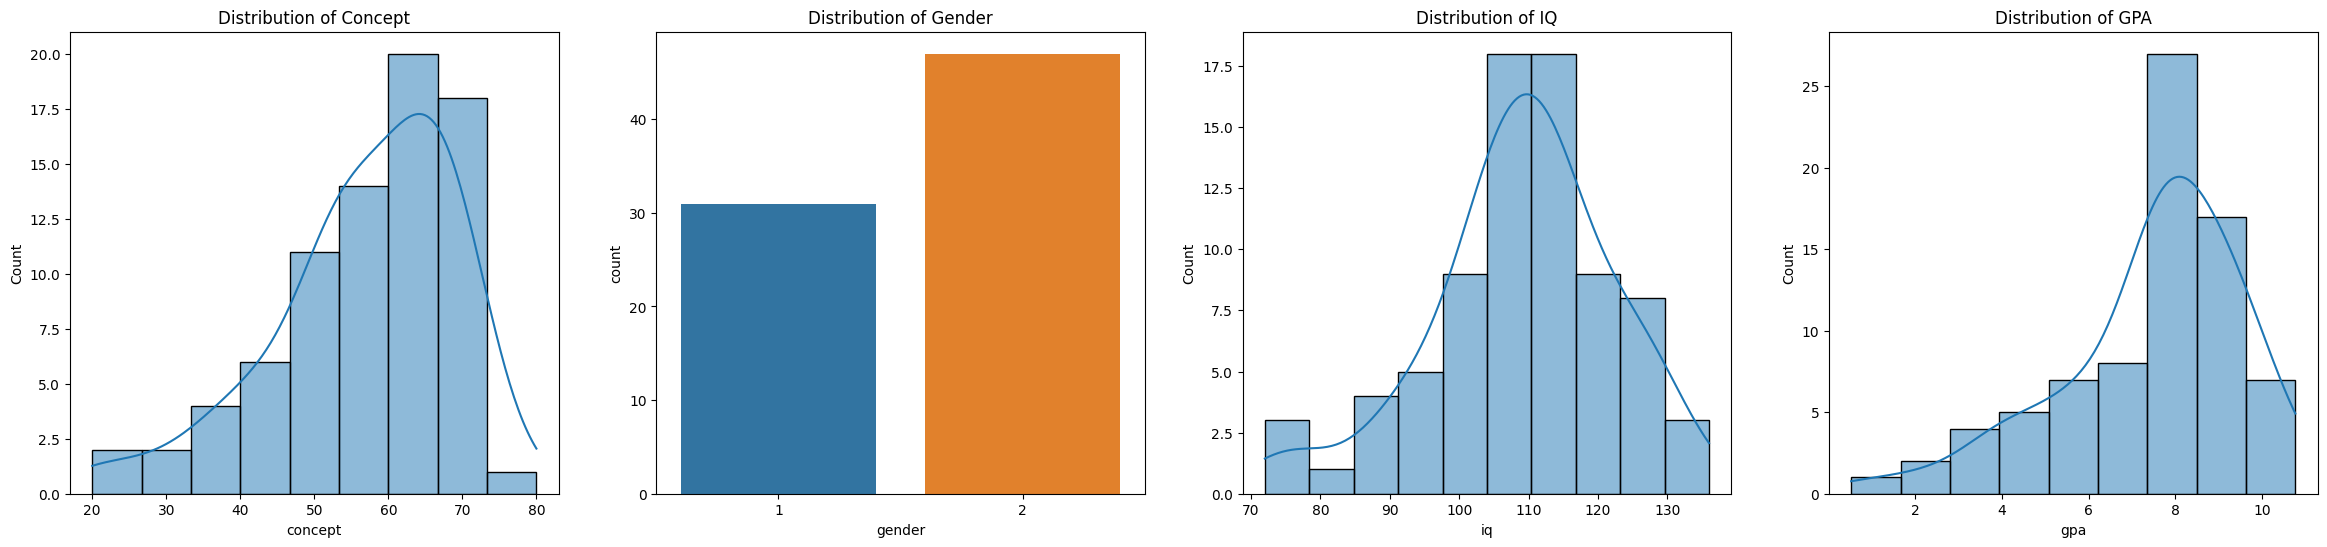

In [4]:
# Create a figure with a size of 29x6 inches
plt.figure(figsize=(29, 6))

# Subplot 1: Distribution of Concept
plt.subplot(1, 4, 1)  # 1 row, 4 columns, this is the 1st subplot
sns.histplot(x=data.concept, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of Concept')  # Set the title of the subplot

# Subplot 2: Distribution of Gender
plt.subplot(1, 4, 2)  # 1 row, 4 columns, this is the 2nd subplot
sns.countplot(data=data, x='gender')  # Create a count plot for gender distribution
plt.title('Distribution of Gender')  # Set the title of the subplot

# Subplot 3: Distribution of IQ
plt.subplot(1, 4, 3)  # 1 row, 4 columns, this is the 3rd subplot
sns.histplot(x=data.iq, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of IQ')  # Set the title of the subplot

# Subplot 4: Distribution of GPA
plt.subplot(1, 4, 4)  # 1 row, 4 columns, this is the 4th subplot
sns.histplot(x=data.gpa, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of GPA')  # Set the title of the subplot

# Display the subplots in the figure
plt.show()


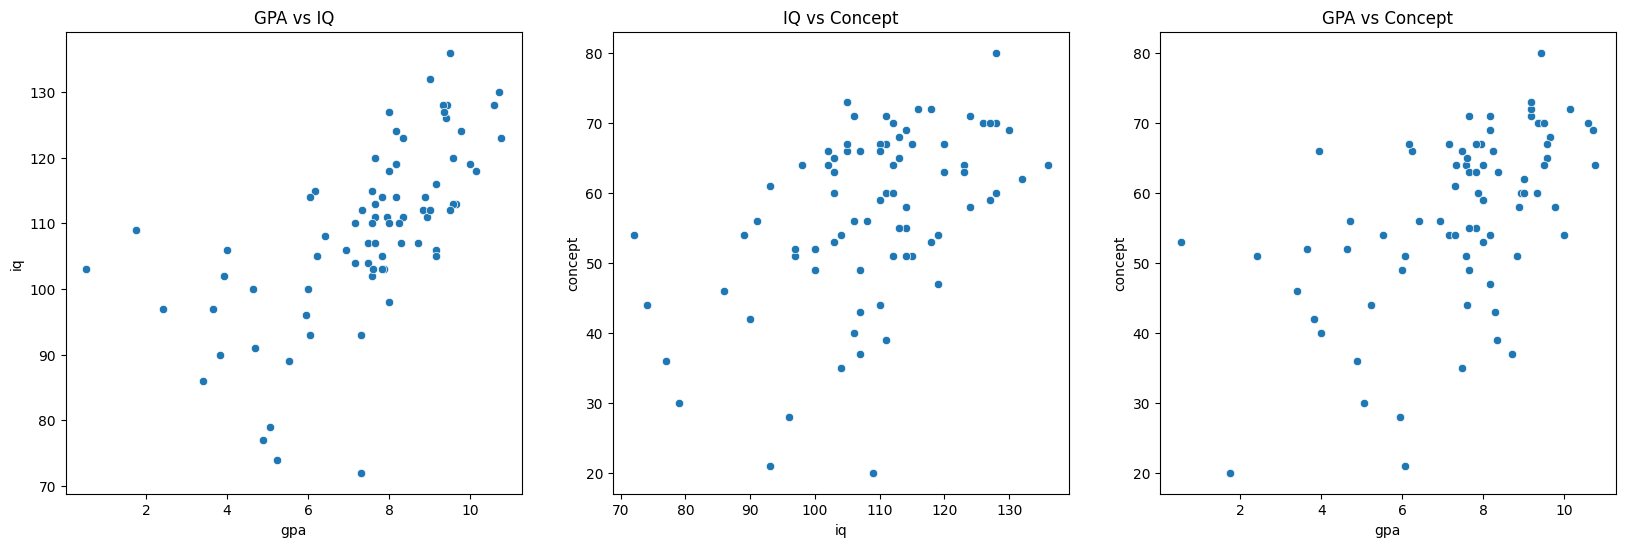

In [42]:
# Create a figure with a size of 20x6 inches
plt.figure(figsize=(20, 6))

# Subplot 1: GPA vs IQ with Gender Differentiation
plt.subplot(1, 3, 1)  # 1 row, 3 columns, this is the 1st subplot
sns.scatterplot(data=data, x='gpa', y='iq')  # Create a scatter plot with different colors for each gender
plt.title('GPA vs IQ')  # Set the title of the subplot

# Subplot 2: IQ vs Concept with Gender Differentiation
plt.subplot(1, 3, 2)  # 1 row, 3 columns, this is the 2nd subplot
sns.scatterplot(data=data, x='iq', y='concept')  # Create a scatter plot with different colors for each gender
plt.title('IQ vs Concept')  # Set the title of the subplot

# Subplot 3: GPA vs Concept with Gender Differentiation
plt.subplot(1, 3, 3)  # 1 row, 3 columns, this is the 3rd subplot
sns.scatterplot(data=data, x='gpa', y='concept')  # Create a scatter plot with different colors for each gender
plt.title('GPA vs Concept')  # Set the title of the subplot

# Display the subplots in the figure
plt.show()


In [47]:
data[(data.gpa < 2) & (data.iq > 100)]

,gpa,iq,gender,concept
21,1.76,109,2,20
50,0.53,103,2,53


In [46]:
print('concept', data.concept.mean())
print('iq', data.iq.mean())
print('gpa', data.gpa.mean())

concept 56.96153846153846
iq 108.92307692307692
gpa 7.446538461538462


In [43]:
data[(data.gpa > 6)&(data.iq<75)]

,gpa,iq,gender,concept
53,7.295,72,1,54


<Axes: >

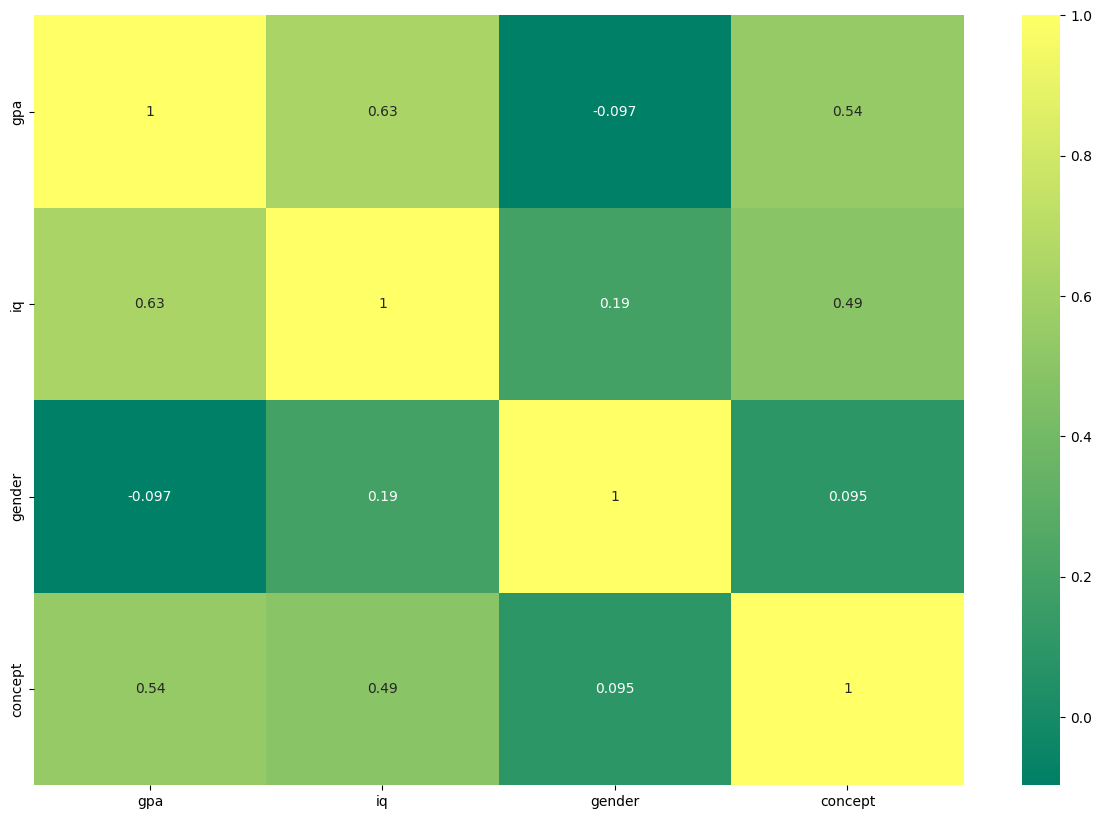

In [40]:
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='summer')

Korelasi Positif antara GPA/IQ dengan Concept Variabel "gpa" (GPA) dan "iq" (IQ) memiliki korelasi positif dengan variabel "concept" dalam heatmap. Ini menunjukkan bahwa dalam dataset ini, ada hubungan positif antara tingkat GPA atau IQ dengan nilai konsep kognitif ("concept"). Artinya, seseorang dengan tingkat GPA atau IQ yang tinggi cenderung memiliki nilai konsep kognitif yang lebih tinggi juga.

Terdapat korelasi positif yang lemah antara jenis kelamin (gender) dan tingkat IQ, yang menunjukkan bahwa dalam dataset ini, jenis kelamin dapat sedikit mempengaruhi tingkat IQ, tetapi pengaruhnya tergolong kecil.

Korelasi positif yang sangat lemah antara jenis kelamin (gender) dan nilai konsep kognitif menunjukkan bahwa dalam dataset ini, jenis kelamin tidak memiliki pengaruh yang signifikan terhadap konsep kognitif. Pengaruh jenis kelamin pada konsep kognitif sangat minim.

Korelasi negatif yang sangat lemah antara jenis kelamin (gender) dan tingkat GPA menunjukkan bahwa ada sedikit hubungan negatif antara jenis kelamin dan tingkat GPA. Namun, pengaruh jenis kelamin pada tingkat GPA sangat kecil, dan faktor-faktor lain lebih mungkin memengaruhi tingkat GPA seseorang dalam dataset ini.

In [7]:
data_cls = data.copy()

In [8]:
data_cls = data_cls.drop(columns = ['gender'])

In [9]:
df_pca = StandardScaler().fit_transform(data_cls)

In [10]:
pca= PCA(n_components=2)
reduced_data= pca.fit_transform(df_pca)

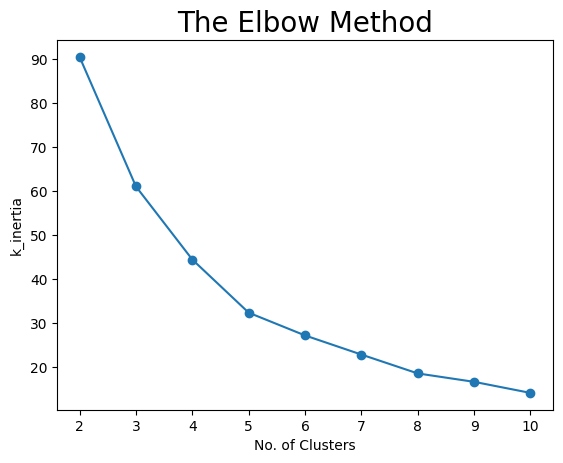

In [11]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(reduced_data)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

In [12]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(reduced_data)

KMeans(n_clusters=5, random_state=3)

In [13]:
clusters= km.predict(reduced_data)

In [14]:
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.681108,-0.526871
1,0.464723,0.959006
2,1.423079,-0.362233
3,-0.323433,-0.673879
4,-0.684421,0.305271


In [15]:
reduced_data['clusters']= clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.681108,-0.526871,3
1,0.464723,0.959006,0
2,1.423079,-0.362233,2
3,-0.323433,-0.673879,3
4,-0.684421,0.305271,3


In [16]:
pca_df_cluster = pd.concat([data, reduced_data], axis=1)

In [17]:
pca_df_cluster

,gpa,iq,gender,concept,PC1,PC2,clusters
0,7.940,111,2,67,-0.681108,-0.526871,3
1,8.292,107,2,43,0.464723,0.959006,0
2,4.643,100,2,52,1.423079,-0.362233,2
3,7.470,107,2,66,-0.323433,-0.673879,3
4,8.882,114,1,58,-0.684421,0.305271,3
...,...,...,...,...,...,...,...
73,9.000,112,1,60,-0.718181,0.108757,3
74,9.500,112,1,70,-1.306879,-0.495602,4
75,6.057,114,2,51,0.437850,0.423516,0
76,6.057,93,1,21,2.709554,1.603799,1


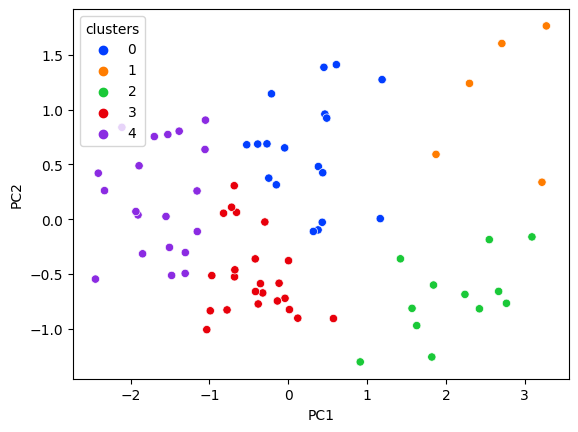

In [18]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="clusters",palette="bright")
plt.show()

In [19]:
df = pca_df_cluster.drop(columns = ['PC1','PC2'])

## Analysis

<Axes: xlabel='clusters', ylabel='count'>

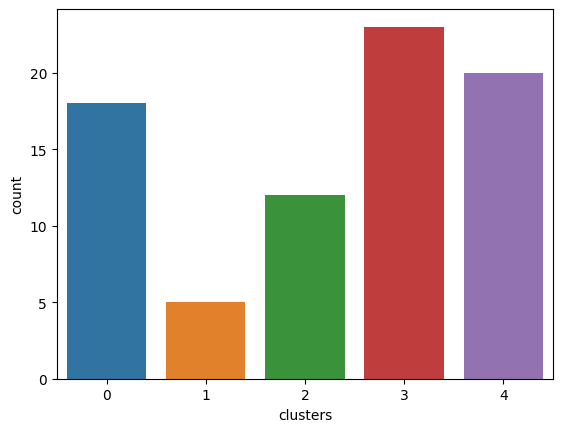

In [20]:
sns.countplot(data = df, x='clusters')

In [21]:
c0 = df[df.clusters == 0]
c1 = df[df.clusters == 1]
c2 = df[df.clusters == 2]
c3 = df[df.clusters == 3]
c4 = df[df.clusters == 4]

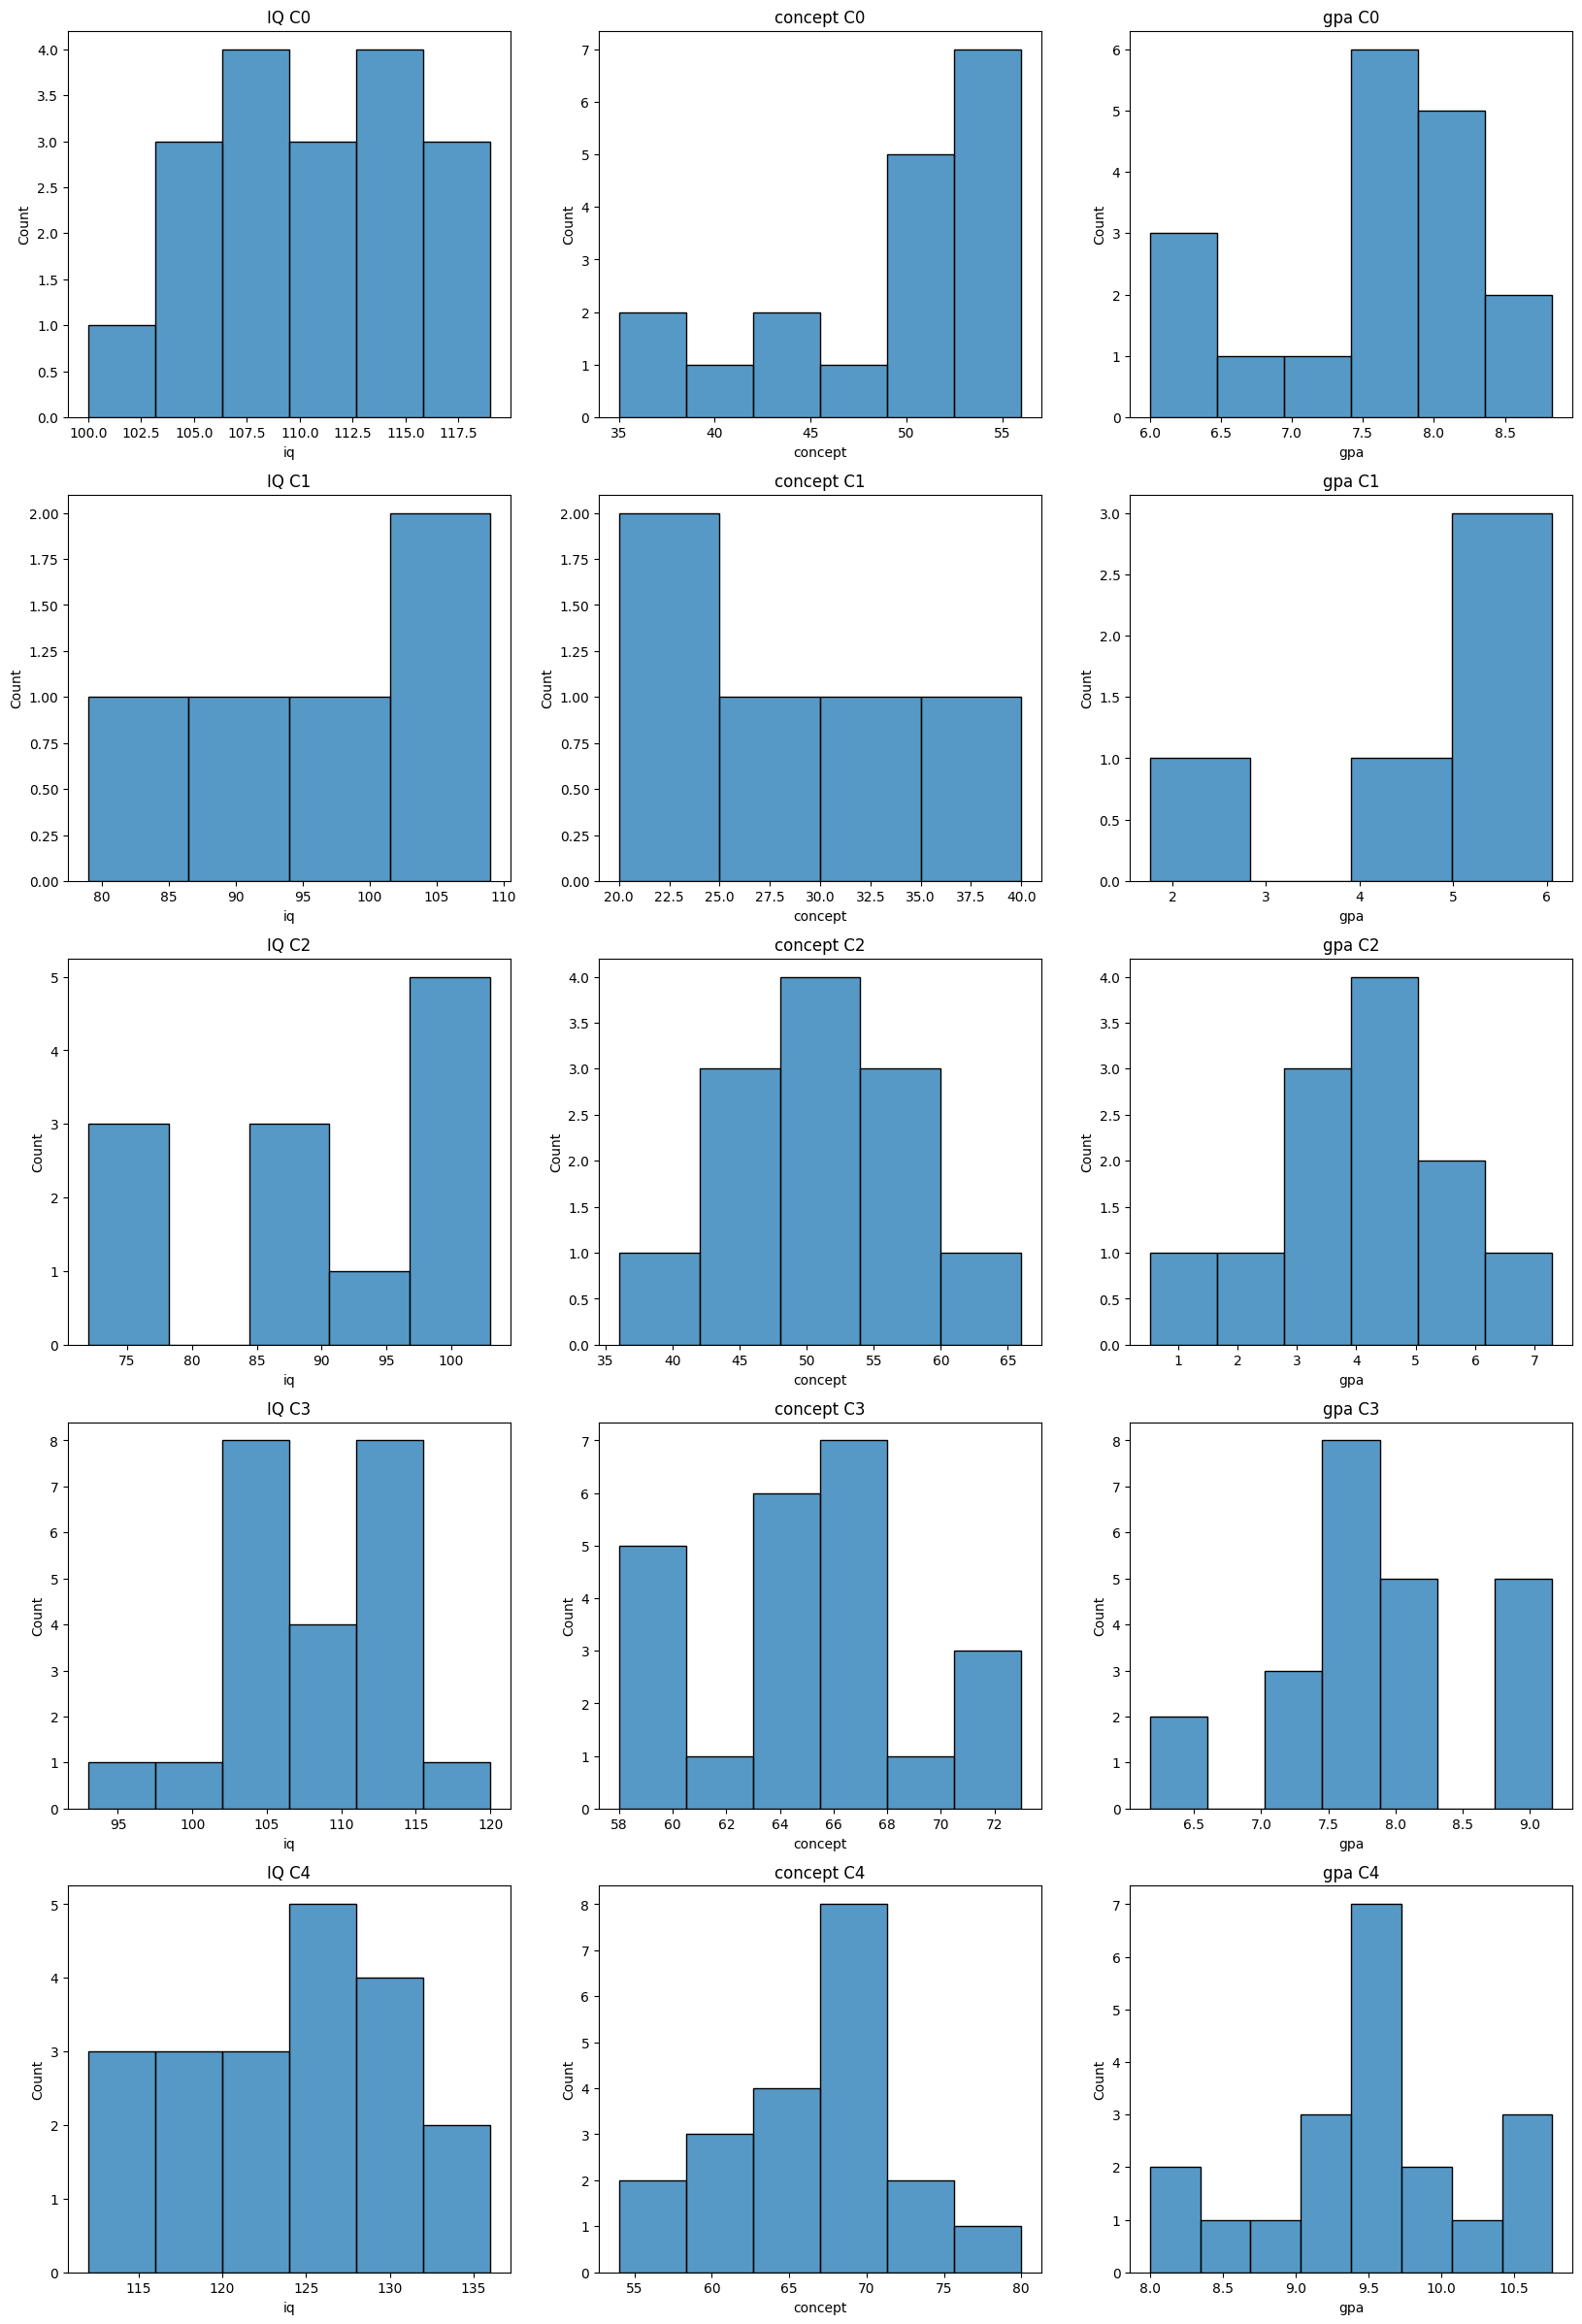

In [22]:
plt.figure(figsize=(20,30))

plt.subplot(5,3,1)
sns.histplot(x=c0.iq)
plt.title('IQ C0')
plt.subplot(5,3,2)
sns.histplot(x=c0.concept)
plt.title('concept C0')
plt.subplot(5,3,3)
sns.histplot(x=c0.gpa)
plt.title('gpa C0')

plt.subplot(5,3,4)
sns.histplot(x=c1.iq)
plt.title('IQ C1')
plt.subplot(5,3,5)
sns.histplot(x=c1.concept)
plt.title('concept C1')
plt.subplot(5,3,6)
sns.histplot(x=c1.gpa)
plt.title('gpa C1')

plt.subplot(5,3,7)
sns.histplot(x=c2.iq)
plt.title('IQ C2')
plt.subplot(5,3,8)
sns.histplot(x=c2.concept)
plt.title('concept C2')
plt.subplot(5,3,9)
sns.histplot(x=c2.gpa)
plt.title('gpa C2')

plt.subplot(5,3,10)
sns.histplot(x=c3.iq)
plt.title('IQ C3')
plt.subplot(5,3,11)
sns.histplot(x=c3.concept)
plt.title('concept C3')
plt.subplot(5,3,12)
sns.histplot(x=c3.gpa)
plt.title('gpa C3')

plt.subplot(5,3,13)
sns.histplot(x=c4.iq)
plt.title('IQ C4')
plt.subplot(5,3,14)
sns.histplot(x=c4.concept)
plt.title('concept C4')
plt.subplot(5,3,15)
sns.histplot(x=c4.gpa)
plt.title('gpa C4')
plt.show()

In [23]:
c0.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,18.0,7.602778,0.826807,6.0,7.24275,7.645,8.173,8.833
iq,18.0,110.444444,5.490336,100.0,107.00000,110.500,114.000,119.000
gender,18.0,1.666667,0.485071,1.0,1.00000,2.000,2.000,2.000
concept,18.0,48.833333,6.653173,35.0,44.75000,51.000,54.000,56.000
clusters,18.0,0.000000,0.000000,0.0,0.00000,0.000,0.000,0.000


In [24]:
c1.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,5.0,4.563,1.770589,1.76,4.0,5.062,5.936,6.057
iq,5.0,96.600,11.886968,79.00,93.0,96.000,106.000,109.000
gender,5.0,1.600,0.547723,1.00,1.0,2.000,2.000,2.000
concept,5.0,27.800,8.074652,20.00,21.0,28.000,30.000,40.000
clusters,5.0,1.000,0.000000,1.00,1.0,1.000,1.000,1.000


In [25]:
c2.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,12.0,4.170083,1.682415,0.53,3.58725,4.2895,4.973,7.295
iq,12.0,89.833333,10.777361,72.00,83.75000,90.5000,97.750,103.000
gender,12.0,1.583333,0.514929,1.00,1.00000,2.0000,2.000,2.000
concept,12.0,50.500000,7.692972,36.00,45.50000,52.0000,54.000,66.000
clusters,12.0,2.000000,0.000000,2.00,2.00000,2.0000,2.000,2.000


In [26]:
c3.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,23.0,7.876739,0.802497,6.173,7.5205,7.833,8.201,9.167
iq,23.0,107.826087,6.042668,93.000,104.0000,110.000,111.500,120.000
gender,23.0,1.521739,0.510754,1.000,1.0000,2.000,2.000,2.000
concept,23.0,64.826087,4.030026,58.000,62.0000,65.000,67.000,73.000
clusters,23.0,3.000000,0.000000,3.000,3.0000,3.000,3.000,3.000


In [27]:
c4.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,20.0,9.49795,0.750583,8.0,9.2915,9.5,9.822,10.76
iq,20.0,123.35000,6.627495,112.0,118.7500,124.0,128.000,136.00
gender,20.0,1.65000,0.489360,1.0,1.0000,2.0,2.000,2.00
concept,20.0,66.40000,6.047183,54.0,62.7500,67.5,70.000,80.00
clusters,20.0,4.00000,0.000000,4.0,4.0000,4.0,4.000,4.00


**Cluster 0: Balanced Achievers**

Cluster 0 represents a group of students characterized by a well-rounded academic performance. Their GPAs fall within the range of 6 to 8.8, indicating consistent and respectable grades. Their IQ scores range from 100 to 119, suggesting above-average cognitive abilities. In terms of conceptual understanding, their scores range from 35 to 56, implying a decent grasp of the subject matter. This cluster portrays students who excel across multiple areas and maintain a good balance between their intellectual capabilities, academic achievements, and understanding of concepts.

**Cluster 1: Striving Improvers**

Cluster 1 encompasses students who are working hard to improve their academic standing. Their GPAs span from 1.76 to 6, indicating a range of academic progress. Their IQ scores range from 79 to 109, showcasing a varying degree of cognitive abilities. In terms of conceptual understanding, scores range from 20 to 40, suggesting efforts to comprehend the subject matter. This cluster indicates students who are in the process of elevating their academic performance and refining their cognitive and conceptual skills.

**Cluster 2: Learning Challengers**

Cluster 2 comprises students who are facing challenges in their academic journey. Their GPAs range from 0.5 to 7.3, reflecting a wide variation in academic performance. IQ scores range from 72 to 103, suggesting diverse cognitive abilities. Their scores in conceptual understanding span from 36 to 66, indicating a struggle to fully grasp the subject matter. This cluster represents students who are encountering difficulties in maintaining consistent academic achievements and face obstacles in comprehending complex concepts.

**Cluster 3: High Achieving Scholars**

Cluster 3 consists of high-achieving students who excel across different metrics. Their GPAs range from 6.17 to 9.16, reflecting exceptional academic performance. IQ scores span from 93 to 120, indicating above-average to high cognitive abilities. Their conceptual understanding scores range from 58 to 73, suggesting a profound grasp of the subject matter. This cluster portrays students who consistently perform at a superior level, displaying not only exceptional cognitive skills but also a deep comprehension of complex concepts.

**Cluster 4: Elite Intellectuals**

Cluster 4 represents a group of intellectually advanced students. Their GPAs range from 8 to 10.76, indicating consistently high academic achievement. IQ scores range from 112 to 136, showcasing exceptional cognitive abilities. Conceptual understanding scores span from 54 to 80, suggesting a profound grasp of complex subject matter. This cluster embodies students who are not only academically outstanding but also possess exceptional cognitive skills, allowing them to effortlessly comprehend intricate concepts.

In summary, the clusters demonstrate varying levels of academic performance, cognitive abilities, and conceptual understanding. These distinctions provide insights into the diverse student profiles within the dataset, showcasing different degrees of academic achievements and intellectual capacities.